Arrhthymia classification using Machine Learning(supervised)

Task: predict each beat and what type of beat/ arrhythmia it is. 

classification models used

*   KNN classifcation
*   Logistic Regression
*   Linear Supprt Vector Machine
*   Gaussian Kernel Support Vector Machine
*   Random Forest










In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('/content/data_arrhythmia.csv', delimiter = ';',na_values = ['?'])


In [115]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


Type of Arrhythmia and code Distribution:

       
      Class code :   Class   :                       
       01             Normal				       
       02             Ischemic changes (Coronary Artery Disease)   
       03             Old Anterior Myocardial Infarction          
       04             Old Inferior Myocardial Infarction           
       05             Sinus tachycardy			           
       06             Sinus bradycardy			           
       07             Ventricular Premature Contraction (PVC)       
       08             Supraventricular Premature Contraction	    
       09             Left bundle branch block 		            
       10             Right bundle branch block		           
       11             1. degree AtrioVentricular block	            
       12             2. degree AV block		            
       13             3. degree AV block		            
       14             Left ventricule hypertrophy 	            
       15             Atrial Fibrillation or Flutter	            
       16             Others				           

In [116]:
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

Histogram for age:


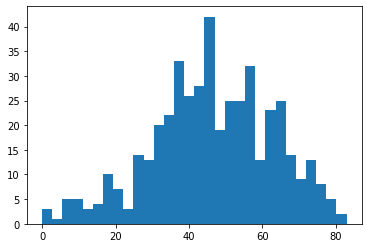

Histogram for sex:


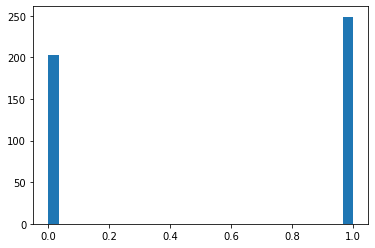

Histogram for height:


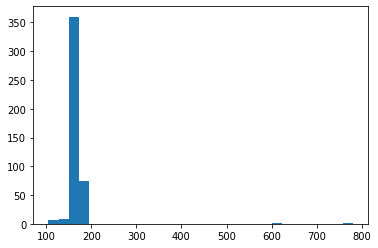

Histogram for weight:


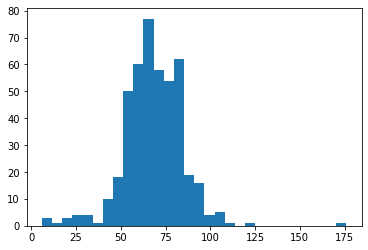

In [117]:
familiar_features = ['age','sex','height','weight'] #list of well known features with missing data

#function that creates an histogram for a feature
def print_hist(df,feature,nbins):
    print("Histogram for " + feature + ":")
    column = df[feature]
    plt.hist(column,bins=nbins)
    plt.show()

for feature in familiar_features: print_hist(df,feature,30)

In [118]:
df['height'].value_counts().sort_index() #to find outliers in height

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

Max height of a person cannot be more than 213 cm

In [119]:
df[df['height']>=213] # removing practically impossible values for height

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
141,1,1,780,6,85,165,237,150,106,88,30.0,30.0,52.0,NaN,138.0,0,28,28,0,0,16,0,0,0,0,0,0,0,32,12,20,12,20,0,0,0,0,0,0,0,...,0.0,19.1,-13.5,0.0,0.0,2.0,1.2,19.3,29.3,1.8,0.0,20.2,-11.6,0.0,0.0,1.4,1.7,21.9,32.4,0.1,0.0,17.2,-7.6,0.0,0,1.2,0.7,13.5,16.1,0.5,0.0,5.0,-4.6,0.0,0,1.3,0.7,2.7,5.5,5
316,0,0,608,10,83,126,232,128,60,125,21.0,-50.0,102.0,NaN,163.0,0,20,48,0,0,12,0,0,0,0,0,0,0,40,28,0,0,20,0,0,0,0,0,0,0,...,0.0,16.0,-9.1,0.0,0.0,0.4,2.7,0.2,19.1,1.2,-0.4,21.4,-13.1,0.0,0.0,0.3,4.8,-14.1,11.8,2.8,-1.3,8.3,-9.3,0.0,0,0.4,3.7,-11.8,8.1,1.9,-0.7,4.5,-5.5,0.0,0,0.5,2.5,-11.8,1.7,5


Replacing height outliers (height more than 213 cm with practical values. here as age is <1(baby), we're replacing them with 78 and 60)

In [120]:
df.loc[df["height"] == 780, "height"] = 78
df.loc[df["height"] == 608, "height"] = 60
#df1[df1['height']>=213]

In [121]:
missing = df.isnull().sum()
missing_df = pd.DataFrame(missing)
missing_df[missing_df[0]!=0]

,0
T,8
P,22
QRST,1
J,376
heart_rate,1


column J has a lot of missing values so we'll drop it

In [122]:
df1 = df.copy()
df1 = df1.drop(columns=['J'])
df1

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,63.0,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,24,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,73.0,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,76,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,28,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,80.0,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,60,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [123]:
from sklearn.impute import SimpleImputer

df2 = df1.copy() #create a new copy of the dataset
X_df = df2.loc[:,df2.columns != 'diagnosis'] #select all features except target feature
X = np.array(X_df) #convert it to array (Simple Imputer doesn't work with dataframes)
imp = SimpleImputer(missing_values=np.nan, strategy='median') #create imp object to impute median in all missing values 
imp = imp.fit(X) #calculate median values of the features with missing values
X_imp = imp.transform(X) #fill dataset with median values wherever finds missing values

In [124]:
from sklearn.model_selection import train_test_split

y = df2.iloc[:,-1] #subset target label


X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=0) #80%/20% splitting

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 278)
(91, 278)
(361,)
(91,)


In [128]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



forest_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
forest_classifier.fit(X_train, y_train)

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

svclassifier_gaus = SVC(kernel="rbf", gamma="auto", C=1)
svclassifier_gaus.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNeighborsClassifier()

Testing

In [130]:
predictions_forest = forest_classifier.predict(X_test)
predictions_SVM=svclassifier.predict(X_test)
predictions_SVM_gaus=svclassifier_gaus.predict(X_test)
predictions_logistic = logistic_reg.predict(X_test)
predictions_knn = knn.predict(X_test)

Evaluation of SVM vs KNN vs logistic regression

In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#for random forest
print('Random forest')
print('confusion_matrix')
print(confusion_matrix(y_test,predictions_forest))
#print(classification_report(y_test,predictions_forest))
print('accuracy')
print(accuracy_score(y_test, predictions_forest))

#for linear kernel SVM
print('\n Linear SVM')
print('confusion matrix')
print(confusion_matrix(y_test,predictions_SVM))
#print(classification_report(y_test,predictions_SVM))
print('accuracy')
print(accuracy_score(y_test, predictions_SVM))

#for gaussian SVM
print('\n Gaussian SVM')
print('Confusion_matrix')
print(confusion_matrix(y_test,predictions_SVM_gaus))
#print(classification_report(y_test,predictions_SVM_gaus))
print('Accuracy')
print(accuracy_score(y_test, predictions_SVM_gaus))


#for logistic 
print("\n Logistic Regression")
print("Confusion-matrix")
print(confusion_matrix(y_test,predictions_logistic))
#print(classification_report(y_test,predictions_logistic))
print('Accuracy')
print(accuracy_score(y_test, predictions_logistic))


#for knn

print('Confusion matrix')
print(confusion_matrix(y_test,predictions_knn))
#print(classification_report(y_test,predictions_knn))
print('Accuracy')
print(accuracy_score(y_test, predictions_knn))

predictions_forest
confusion_matrix
[[44  2  0  0  0  1  0  0  2  0  0]
 [ 4  4  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 2  1  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 3  1  1  0  0  1  0  0  0  0  0]]
accuracy
0.7142857142857143


In [132]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#for random forest
print('Random forest')
print('confusion_matrix')
print(confusion_matrix(y_test,predictions_forest))
#print(classification_report(y_test,predictions_forest))
print('accuracy')
print(accuracy_score(y_test, predictions_forest))

#for linear kernel SVM
print('\n Linear SVM')
print('confusion matrix')
print(confusion_matrix(y_test,predictions_SVM))
#print(classification_report(y_test,predictions_SVM))
print('accuracy')
print(accuracy_score(y_test, predictions_SVM))

#for gaussian SVM
print('\n Gaussian SVM')
print('Confusion_matrix')
print(confusion_matrix(y_test,predictions_SVM_gaus))
#print(classification_report(y_test,predictions_SVM_gaus))
print('Accuracy')
print(accuracy_score(y_test, predictions_SVM_gaus))


#for logistic 
print("\n Logistic Regression")
print("Confusion-matrix")
print(confusion_matrix(y_test,predictions_logistic))
#print(classification_report(y_test,predictions_logistic))
print('Accuracy')
print(accuracy_score(y_test, predictions_logistic))


#for knn
print('\n K-Nearest Neighbors')
print('Confusion matrix')
print(confusion_matrix(y_test,predictions_knn))
#print(classification_report(y_test,predictions_knn))
print('Accuracy')
print(accuracy_score(y_test, predictions_knn))

Random forest
confusion_matrix
[[44  2  0  0  0  1  0  0  2  0  0]
 [ 4  4  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0]
 [ 1  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 2  1  0  0  0  0  0  0  8  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 3  1  1  0  0  1  0  0  0  0  0]]
accuracy
0.7142857142857143

 Linear SVM
confusion matrix
[[37  4  0  1  2  1  0  0  3  0  0  1]
 [ 5  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]
 [ 2  0  1  0  0  0  0  0  6  0  0  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  0  0  2  0  0  0  0  1  0]]
accuracy
0.6043956043956044

 Gaussian SVM
Co